# Import des constantes

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

#Tokenization 
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TweetTokenizer
from functools import reduce
from operator import add
import collections

#Word2Vec
from gensim.models import Word2Vec
from multiprocessing import cpu_count

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Clustering 
from sklearn.cluster import KMeans

# Import de la base

In [2]:
# Import de la base intiale 
f = open('1377884570_tweet_global_warming.txt', 'r',newline='', encoding='ISO-8859-1')
content = f.read().split('\r')

content_new=[]
for x in content : 
    if len(x)>0:
        content_new.append(x)

content_new=content_new[1:len(content_new)]

In [3]:
# Création du dataframe

col_tweet=[]
col_existence=[]
col_score=[]

#Split tweet , Note

for line in content_new:
    if len(line.split('[link]'))==2:
        (x,y)=line.split('[link]')
        col_tweet.append(x)
        col_existence.append(y)
    else : 
        if len(line.split(',Yes,'))==2:
            col_tweet.append(line.split(',Yes,')[0])
            col_existence.append(',Yes,'+line.split(',Yes,')[1])
        elif len(line.split(',No,'))==2:
            col_tweet.append(line.split(',No,')[0])
            col_existence.append(',No,'+line.split(',No,')[1])
        elif len(line.split(',Y,'))==2:
            col_tweet.append(line.split(',Y,')[0])
            col_existence.append(',Yes,'+line.split(',Y,')[1])
        elif len(line.split(',N/A,'))==2:
            col_tweet.append(line.split(',N/A,')[0])
            col_existence.append(',N/A,'+line.split(',N/A,')[1])
        elif len(line.split(',NA,'))==2:
            col_tweet.append(line.split(',NA,')[0])
            col_existence.append(',NA,'+line.split(',NA,')[1])
        elif len(line.split(',N,'))==2:
            col_tweet.append(line.split(',N,')[0])
            col_existence.append(',No,'+line.split(',N,')[1])
        else : 
            print('erreur')
            #print(line.split('[link]'))
col_tweet.append('I truly  Fat ASS Gore should get the Scam Artist Award of the decade with his Global Warming and Energy Credits worth close to Billion')
col_existence.append(' ,NA')
col_tweet.append('Despite Climategate, LEFT investing heavily in global warming hysteria as new way 2 impose nat\'l & international controls on human freedom.')
col_existence.append(' ,NA')
        
# Split Existence/Note
col_existence_new=[]

for x in col_existence:
    if len(x.split(','))==3:
        col_existence_new.append(x.split(',')[1])
        col_score.append(x.split(',')[2])
    else:
        col_existence_new.append('NA')
        col_score.append('NA')
        
#Nettoyage existence
for avis in range(len(col_existence_new)):
    if col_existence_new[avis]=='NA' or col_existence_new[avis]=='N/A' or col_existence_new[avis]=='':
        col_existence_new[avis]=np.nan
        
#Nettoyage score
for score in range(len(col_score)):
    if 'NA' not in col_score[score]:
        col_score[score]=col_score[score].split('\t')[0]
        if len(col_score[score].split('"'))>1:
            col_score[score]=float(col_score[score].split('"')[0])
        else: 
            col_score[score]=float(col_score[score])
            
    else : 
        col_score[score]=np.nan

#Creation du DataFrame
dic={'Tweet':col_tweet,'Existence':col_existence_new,'Score':col_score}
df=pd.DataFrame(dic)
    

erreur
erreur


In [4]:
df.drop_duplicates(['Tweet'], inplace=True)
df.reset_index(inplace=True,drop=True)

# Quelques statistiques

In [5]:
# Exemples de tweets

print('Exemples de tweets qui croient au réchauffement climatique : ')
print(' ')
for k in range(5):
    print(df[df.Existence=='Yes'].reset_index().iloc[k]['Tweet'])
    print(' ')
    
print('#'*50)
print('#'*50)
print(' ')
print('Exemples de tweets qui doutent du réchauffement climatique : ')
print(' ')
for k in range(5):
    print(df[df.Existence=='No'].reset_index().iloc[k]['Tweet'])
    print(' ')

Exemples de tweets qui croient au réchauffement climatique : 
 
Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. 
 
Fighting poverty and global warming in Africa 
 
Carbon offsets: How a Vatican forest failed to reduce global warming 
 
URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change 
 
RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle 
 
##################################################
##################################################
 
Exemples de tweets qui doutent du réchauffement climatique : 
 
Wait here's an idea: it's natural climate change, not human induced global warming. 
 
@New_federalists  i have it on good auth tht global warming also causes toe fungus.  We R all fortunate tht thr IS no global warming! #tcot
 
Illegal war and the myth of global warming|My main campaign platform for this election will be the illegal .. 
 
the scientific com

In [6]:
print('On dispose de {} tweets.'.format(df.shape[0]))

print(' ')
print('On a {} données manquantes sur le label de l\'avis du tweet (Yes, No) .'.format(str(df.isnull().sum()['Existence'])))
print(' ')

#Personnes convaincues du changement climatique 
print('On a {} tweets qui croit au Changement climatique.'.format(str(df[df.Existence=='Yes'].shape[0])))
m=round(df[df.Existence=='Yes'].Score.describe()['mean'],2)
std=round(df[df.Existence=='Yes'].Score.describe()['std'],2)
print('Parmis ces personnes, le score est de {} en moyenne, avec un écart-type de {}.'.format(str(m),str(std)))
print(' ')

#Personnes qui doutent du changement climatique 
print('On a {} tweets qui remettent en doute le Changement climatique.'.format(str(df[df.Existence=='No'].shape[0])))
m=round(df[df.Existence=='No'].Score.describe()['mean'],2)
std=round(df[df.Existence=='No'].Score.describe()['std'],2)
print('Parmis ces personnes, le score est de {} en moyenne, avec un écart-type de {}.'.format(str(m),str(std)))


On dispose de 5539 tweets.
 
On a 1683 données manquantes sur le label de l'avis du tweet (Yes, No) .
 
On a 2821 tweets qui croit au Changement climatique.
Parmis ces personnes, le score est de 0.82 en moyenne, avec un écart-type de 0.18.
 
On a 1035 tweets qui remettent en doute le Changement climatique.
Parmis ces personnes, le score est de 0.76 en moyenne, avec un écart-type de 0.19.


/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


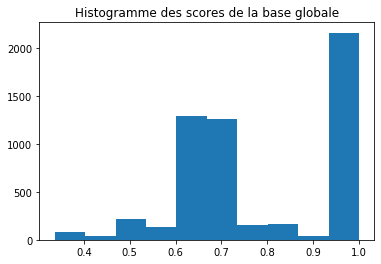

In [7]:
x=plt.hist(list(df.Score))
x=plt.title('Histogramme des scores de la base globale')

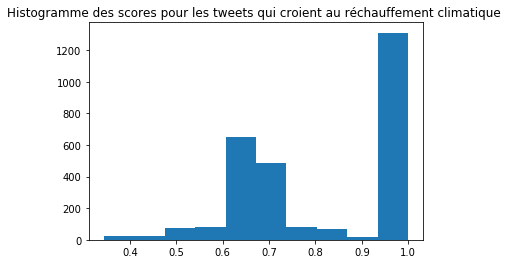

In [8]:
x=plt.hist(list(df[df.Existence=='Yes'].Score))
x=plt.title('Histogramme des scores pour les tweets qui croient au réchauffement climatique ')

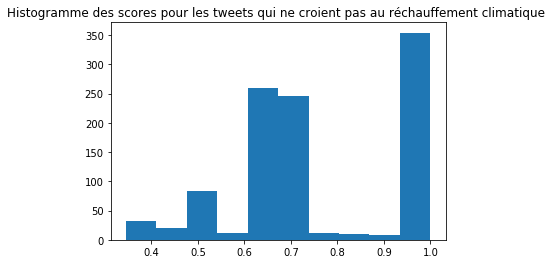

In [9]:
x=plt.hist(list(df[df.Existence=='No'].Score))
x=plt.title('Histogramme des scores pour les tweets qui ne croient pas au réchauffement climatique ')

Les scores sont des indicateurs sur la precision de la classification du tweet. Globalement, on a la même certitude sur cette précision pour les deux types de tweets (Yes et No).

# Tokenization des tweets

In [10]:
#Nombre de mots différents dans l'ensemble des articles 

##Récupération de tout les mots de tout les tweets
arr=df.Tweet.apply(lambda x : x.split(' ')).array
arr = reduce(add, arr)


##Nombre de mots différents dans l'ensemble des articles 
print('En utilisant le séparateur \' \', on obtient {} mots dans l\'ensemble des tweets'.format(len(set(arr))))


En utilisant le séparateur ' ', on obtient 19602 mots dans l'ensemble des tweets


In [11]:
# Tokenization en utilisant le Tokenizer Tweeter

arr_tokens = df.Tweet.apply(lambda x: TweetTokenizer().tokenize(x)).array
arr_tokens = reduce(add, arr_tokens)
print('En utilisant le Tokenizer TweetTokenizer, on obtient un vocabulaire de {} mots.'.format(len(set(arr_tokens))))

En utilisant le Tokenizer TweetTokenizer, on obtient un vocabulaire de 15804 mots.


# Nettoyage des Tokens

In [12]:
#On prend toutes les phrases de touts les texts, et on les concatène dans une liste, en les traitant auparavant

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

def remove_hashtags(tokens):
    tokens= map(lambda x : x.replace('#',''),tokens) #map : parcours tout les tokens
    return list(tokens)

def remove_url(tokens): #pb pour https
    tokens= filter(lambda x: "http" not in x, tokens) #filter : garde là où il y a True
    return list(tokens)

def remove_html(tokens):
    tokens= filter(lambda x: x[0]+x[-1]!='<>',tokens)
    return list(tokens)

def remove_www(tokens):
    tokens= filter(lambda x: "www" not in x, tokens) #filter : garde là où il y a True
    return list(tokens)

'''
def remove_x95(clean_corpus):
    for sentence_r in range(len(clean_corpus)):
        sentence=clean_corpus[sentence_r]
        for x in range(len(sentence)):
            if '\x95' in sentence[x]:
                y=sentence[x].split('\x95')
                new_x=''
                for part_x in y:
                    new_x=new_x+part_x
                sentence[x]=new_x
        clean_corpus[sentence_r]=sentence
    return(clean_corpus)
'''

def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def clean_ponctuation(text_tokens): # Nettoyage de la ponctuation

    list_word_clean_ponctuation=[]
    for tweet in text_tokens:
        list_tweet=[]
        for word in tweet:
            if len(word)<2:
                if (word=='a') or (word=='i') or (word=='u'):
                    list_tweet.append(word)
                if RepresentsInt(word):
                    list_tweet.append(word)
            else :
                if (word!='..') & (word!='...'):
                    list_tweet.append(word)
        list_word_clean_ponctuation.append(list_tweet)
    
    return(list_word_clean_ponctuation)

def remove_arobase(text_tokens):
    
    list_new_tokens=[]
    for tweet in text_tokens:
        new_tweet=[]
        for word in tweet: 
            if '@' not in word:
                new_tweet.append(word)
        list_new_tokens.append(new_tweet)
    
    return(list_new_tokens)

###############################################################
###############################################################
###############################################################

def clean_text_first(corpus):
    
    tok=TweetTokenizer()
    tokens=[]
    for sample in corpus:
        token=tok.tokenize(sample) 
        token=remove_url(token)
        token=remove_html(token)
        token=remove_hashtags(token)
        token=remove_www(token)
        token=list(map(lambda x : x.lower(),token)) #.lower() : met les majuscules en minuscules
        tokens.append(token) #ajout du token à l'ensemble des phrases
    
    #Nettoyage de la ponctuation
    tokens=clean_ponctuation(tokens)
    
    #Nettoyage des arobase : pour la plupart, se sont des noms propres
    tokens=remove_arobase(tokens)
    
    return tokens

def clean_text_second(corpus,threshold): #On rajoute l'association des mots qui vont ensembles
    
    #clean les textes
    tokens=clean_text_first(corpus)
    
    #associer les mots
    phrases=Phrases(tokens,threshold=threshold) #On fait apprendre le modèle d'association sur tout les mots
    phraser=Phraser(phrases) #Outil pour associer
    
    clean_tokens=[]
    for token in tokens: #On parcours les phrases et on associe les mots
        new_tokens=phraser[token]
        clean_tokens.append(new_tokens)
        
    #tokens = remove_x95(tokens)
    
    return(clean_tokens)


In [13]:
#clean_text_first(df.Tweet) #sans association de mots

In [49]:
list_words=clean_text_second(df.Tweet,threshold=1000) #avec association de mots

In [15]:
#Mots les plus fréquents après nettoyage des tokens

counter=collections.Counter(reduce(add, list_words))

#10 mots les plus fréquents 
number_word=10
print('Les {} mots qui apparaissent le plus sont (par ordre décroissant) :'.format(number_word))
print(' ')
for word in counter.most_common(number_word):
    print(word[0]+' ('+str(word[1])+') ') 

Les 10 mots qui apparaissent le plus sont (par ordre décroissant) :
 
climate (3348) 
change (3027) 
global (2869) 
warming (2765) 
the (2275) 
to (1674) 
of (1440) 
on (1063) 
a (1056) 
in (998) 


In [16]:
# Taille moyenne des tweet : 
list_words
mean=0
for tweet in list_words:
    mean=mean+len(tweet)
    
print('En moyenne, on a retenu {} mots par tweet '.format(str(round(mean/len(list_words),0))))

En moyenne, on a retenu 14.0 mots par tweet 


# Représentation des Tweets

## Avec Word2Vec

On utilise tout d'abord l'algorithme Word2Vec pour représenter ces tweets. Chaque mot à une représentation vectorielle. Pour chaque tweet, on fait la moyenne des vecteurs (chaque mot) inclut dans ce tweet.

In [60]:
#Cleaning des tweets
clean_text=clean_text_second(df.Tweet,threshold=1000)

print("Entrainement du modèle Word2Vec ...")
model = Word2Vec(clean_text, size=100, window=5, min_count=3, workers=4) 

model.train(clean_text, total_examples=len(clean_text), epochs=10) #réseau de neuronne du Word2Vec
model_wv = model.wv

Entrainement du modèle Word2Vec ...


In [61]:
# Représentation des tweets en moyennant les mots

def tokens2vectors(tokenCorpus):
    ''' transforms our X into a list of list of vec (2D array) '''
    new_sample = list()
    i=0
    for sample in tokenCorpus:
        tweetVecs = list()
        for token in sample:
            try : 
                tweetVecs.append(model_wv.get_vector(token)  )
            except: 
                i=i+1
                tweetVecs.append( np.zeros(100) ) 
        new_sample.append(np.mean(tweetVecs, axis=0))
    
    return np.array(new_sample)


X= tokens2vectors(clean_text)

Y=[]
for x in list(X):
    try: Y.append(list(x))
    except : pass
    
df_representation_W2v= pd.DataFrame(Y).T

/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


6978


In [19]:
df_representation_W2v

,0,1,2,3,4,5,6,7,8,9,...,5527,5528,5529,5530,5531,5532,5533,5534,5535,5536
0,0.231585,0.151163,0.073116,0.142370,0.103849,-0.006454,0.356444,0.110716,0.102889,-0.245600,...,0.136608,0.100538,0.156224,0.017823,0.097291,0.193199,-0.142301,-0.035692,0.053435,-0.008556
1,0.234641,0.272158,0.358477,0.161240,0.265180,0.266771,0.147805,0.138410,0.231763,0.377306,...,0.131544,0.215738,0.104093,0.173507,0.198876,0.366641,0.239651,0.170668,0.245517,0.225361
2,0.251932,0.409688,0.368279,0.141289,0.364655,0.423418,-0.046299,0.121733,0.269102,0.622014,...,0.103441,0.308851,0.143387,0.301402,0.293130,0.398373,0.395591,0.315253,0.326125,0.321966
3,-0.041058,-0.012350,-0.078078,-0.186405,-0.109355,-0.110934,-0.155026,-0.147576,-0.098623,-0.277977,...,-0.227338,-0.047307,-0.134986,-0.079196,-0.081337,0.015762,-0.160332,-0.061306,-0.047760,-0.098994
4,0.196058,0.193707,0.046136,0.308916,0.110850,0.109412,0.391374,0.255873,0.215590,-0.100335,...,0.335335,0.117763,0.292548,0.163065,0.201584,0.104444,0.054773,0.077808,0.115127,0.165373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.338004,-0.448492,-0.407415,-0.334126,-0.362681,-0.410135,-0.265093,-0.290675,-0.372448,-0.532854,...,-0.413611,-0.351949,-0.298367,-0.352100,-0.313564,-0.415174,-0.427682,-0.296633,-0.323871,-0.403244
96,-0.260541,-0.317578,-0.358566,-0.402495,-0.317551,-0.331603,-0.328416,-0.329614,-0.354142,-0.477308,...,-0.435722,-0.298772,-0.339823,-0.312367,-0.252384,-0.252861,-0.417251,-0.259335,-0.278924,-0.379769
97,-0.091331,-0.048536,-0.171515,-0.248557,-0.138849,-0.173732,-0.270104,-0.209832,-0.156161,-0.328426,...,-0.289519,-0.045965,-0.195670,-0.094860,-0.133596,-0.061210,-0.285379,-0.098825,-0.098370,-0.148948
98,0.475029,0.616331,0.295438,0.449078,0.429179,0.476891,0.434953,0.379936,0.429556,0.301831,...,0.487893,0.371047,0.454772,0.391740,0.476402,0.453732,0.372838,0.326981,0.377145,0.413909


In [20]:
# Etude de cette représentation via la cosinus similarité

def closest_to(word,n_top_similar):
    print('Les {} mots les plus proches de {} sont : '.format(n_top_similar,word))
    print(' ')
    for word in [w[0] for w in model_wv.most_similar(word,topn=n_top_similar)]:
        print(word)
        
closest_to('change',10)
print(' ')
print('#'*50)
print(' ')

closest_to('climate',10)

Les 10 mots les plus proches de change sont : 
 
qdr
align
bank
immigration
reform
ch
legislation
arizona's
powers
limbo
 
##################################################
 
Les 10 mots les plus proches de climate sont : 
 
legislation
immigration
legisl
tale
extend
reveal_further
panel
sidelining
powers
reform


# Une approche naïve avec TF IDF


Pour chaque mot, on a un vecteur le représentant. Pour réprésenter un tweet, on fait la moyenne des vecteurs correspondant à chacun de ces mots.

##### Représentation des mots

In [21]:
# Initialisation des mots TF-IDF
cv=CountVectorizer()
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)

In [22]:
# Formatage de la base pour la méthode TF-IDF
corpus=clean_text_second(df.Tweet,threshold=2000)
corpus_new=[]
for tweet in corpus: 
    tweet_sentence=''
    for word in tweet:
        tweet_sentence=tweet_sentence+' '+word
    corpus_new.append(tweet_sentence)
    
# Caclul des scores TF-IDF de chaque mot
word_count_vector=cv.fit_transform(corpus_new)
tfidf_transformer.fit(word_count_vector)

count_vector=cv.transform(corpus_new)
tf_idf_vector=tfidf_transformer.transform(count_vector)
feature_names = cv.get_feature_names()


In [24]:
# Exemple de représentation du premier tweet 

#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]

#print du tweet
print(' ')
print('Tweet initial : '+df.iloc[0]['Tweet'])
print(' ')

#print du tweet nettoyé
print('Tweet nettoyé : '+corpus_new[0])
print(' ')
print('Scores TF-IDF : ')
#print des scores 
pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["first_tweet"]).sort_values(by=["first_tweet"],ascending=False)

 
Tweet initial : Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. 
 
Tweet nettoyé :  global warming report urges governments to act brussels belgium ap the world faces increased hunger and
 
Scores TF-IDF : 


,first_tweet
brussels,0.358888
belgium,0.358888
hunger,0.337373
urges,0.323202
governments,0.312617
...,...
explain,0.000000
experts,0.000000
expert,0.000000
experiments,0.000000


In [33]:
# Représentation de tout les tweets 

dt_tfidf_tweet = pd.DataFrame(tf_idf_vector[0:2].T.todense(),index=feature_names)
dt_tfidf_tweet

,0,1
00,0.0,0.0
000,0.0,0.0
02,0.0,0.0
04,0.0,0.0
062,0.0,0.0
...,...,...
à_only,0.0,0.0
à_poisoning,0.0,0.0
à_s,0.0,0.0
à_t,0.0,0.0


Problématique : matrice très sparse (beaucoup de zéros)

# Avec du clustering de mots d'après Word2Vec

L'idée est d'utiliser la représentation de Word2Vec des mots pour faire du clustering sur tout les mots contenus dans la base. On se place ensuite au niveau de chaque tweet et on le représente par un vecteur qui compte le nombre de mots contenu dans chaque cluster. Plus pour analyser quels sont les mots qui se rapproche le plus selon la distance euclidienne ? (plutot que la cos similarité).

In [66]:
# Représentation Word2Vec de chaque mot 

clean_text=clean_text_second(df.Tweet,threshold=1000)

print("Entrainement du modèle Word2Vec ...")
model = Word2Vec(clean_text, size=100, window=5, min_count=3, workers=4) 

model.train(clean_text, total_examples=len(clean_text), epochs=10) #réseau de neuronne du Word2Vec
model_wv = model.wv

Entrainement du modèle Word2Vec ...


In [67]:
# Application du modèle W2v sur chaque token du corpus

clean_text = reduce(add, clean_text)
clean_text = set(clean_text)

def Representation_W2v(tokenCorpus_unique):
    new_sample = {}
    number_not_in_vocab=0
    for token in tokenCorpus_unique:
            try : 
                new_sample[token]=list(model_wv.get_vector(token))
            except: number_not_in_vocab=number_not_in_vocab+1
    
    print('{} mots sur {} ne sont pas dans le vocabulaire du modèle Word2Vec entrainé'.format(str(number_not_in_vocab),str(len(tokenCorpus_unique))))
    return new_sample

Representation_for_clustering=pd.DataFrame(Representation_W2v(clean_text)).T
Representation_for_clustering

5305 sur 8595 ne sont pas dans le vocabulaire du modèle Word2Vec entrainé


In [69]:
Representation_for_clustering

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
goes,0.122800,0.144504,0.140187,-0.067737,0.175853,-0.098972,0.038210,-0.323761,0.157308,0.004284,...,-0.152768,-0.073552,-0.008023,0.198721,0.225388,-0.244660,-0.288455,-0.128753,0.292307,-0.222587
kids,-0.005635,0.107130,0.144896,-0.049324,0.048938,-0.110232,0.098668,-0.317000,0.089937,0.075107,...,-0.133693,-0.075549,0.014891,0.164881,0.169205,-0.168924,-0.172270,-0.079434,0.204529,-0.110598
way,0.003344,0.223247,0.313947,-0.128078,0.121334,-0.211594,0.211394,-0.748043,0.228341,0.171735,...,-0.271408,-0.178806,-0.013306,0.363037,0.394783,-0.420372,-0.355643,-0.230895,0.387712,-0.223542
cause,0.074173,0.386671,0.482558,-0.038281,-0.133846,-0.315780,0.439500,-0.871008,0.207984,0.241556,...,-0.246951,-0.240948,-0.145416,0.416895,0.349004,-0.441297,-0.262328,-0.172549,0.349467,-0.148784
reminding,-0.003189,0.056232,0.065434,-0.057459,0.007311,-0.048342,0.065785,-0.161821,0.004852,0.019016,...,-0.067688,-0.033220,0.047907,0.050937,0.096906,-0.056147,-0.090628,-0.050083,0.059451,-0.031128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
belief,0.049002,0.138154,0.168448,-0.091389,0.125838,-0.118271,0.099431,-0.396778,0.133435,0.045762,...,-0.157462,-0.050805,-0.005014,0.216999,0.214113,-0.205685,-0.231601,-0.121349,0.275925,-0.195891
ok,-0.050264,0.090456,0.176545,-0.116576,0.103199,-0.156815,0.155655,-0.451350,0.097688,0.106334,...,-0.157814,-0.068910,0.068837,0.254995,0.241713,-0.220757,-0.250343,-0.161370,0.264842,-0.139815
iceland,-0.077911,0.186505,0.392422,-0.127865,0.132483,-0.229768,0.285382,-0.742903,0.178304,0.194057,...,-0.246844,-0.167081,-0.071641,0.428722,0.406804,-0.446940,-0.366821,-0.164390,0.456962,-0.238140
ruse,0.021283,0.037299,0.037412,-0.026468,0.055175,-0.032279,0.029146,-0.126785,0.036809,0.016773,...,-0.046990,-0.030422,0.006864,0.072238,0.069490,-0.071309,-0.082006,-0.053621,0.081575,-0.052474


In [74]:
# Application du clustering 

n_cluster = 5

kmeans = KMeans(n_clusters=n_cluster) 
kmeans.fit(Representation_for_clustering)
clusters=kmeans.predict(Representation_for_clustering).tolist()

data=[]
for x in range(len(clusters)):
    data.append([Representation_for_clustering.index.tolist()[x],clusters[x]])
    
    
results=pd.DataFrame(data= data , columns=['token','cluster'])

In [75]:
for k in range(n_cluster):
    print('Nombre de mots dans le cluster numéro {} : '.format(k)+str(len(results[results.cluster==k])))
    print(' ')
    print('#'*20)
    print(' ')

Nombre de mots dans le cluster numéro 0 : 482
 
####################
 
Nombre de mots dans le cluster numéro 1 : 1024
 
####################
 
Nombre de mots dans le cluster numéro 2 : 126
 
####################
 
Nombre de mots dans le cluster numéro 3 : 103
 
####################
 
Nombre de mots dans le cluster numéro 4 : 1555
 
####################
 


In [83]:
# Etude de chaque cluster spécifiquement
cluster=2

list_word=''
for word_index in range(20):
    word=list(results[results.cluster==cluster]['token'])[word_index]
    list_word=list_word+' , '+word
print('Parmis les mots du cluster {}, il y a : '.format(cluster)+list_word)

Parmis les mots du cluster 2, il y a :  , says , body , plan , copenhagen , health , experts , sec , humanitarian , climate , ad , limbo , move , summit , art , à_o , forming , head , issues , bill , agency


Interprétation des clusters ? Refaire avec des modèles pré-entrainés ? 

# Représentation de tweet avec des modèles pré-entrainés : Fast2vec, Word2vec et Bert

Utilisation en mode pré-entrainé